# Week 2 Exercise B: ICP04-Gradient Descent
# Name: Rodgers Okeyo Ochieng
Description: In this practice assignment, you will build upon the model fitting notebook created for WE01 part 2, specifically focusing on the third-order polynomial model. Your task is to update the notebook by incorporating another model, SGDGradientDescent, and comparing its performance to the standard linear regression techniques.

You will also incorporate data splitting (cross-validation) to train your model (use an 80/20 split).

To start, revisit the model fitting notebook you previously created for the third-order polynomial model. Use previous tutorials to understand and apply data splitting (80% to training, 20% to testing). Also, utilize the official documentation provided at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.htmlLinks to an external site. (Links to an external site) to understand the implementation details of SGDRegressor.

Include the necessary code and data processing steps in the notebook to integrate the SGDRegressor model into your analysis. Train and evaluate the SGDRegressor using the same dataset used for the third-order polynomial model (but, this time with the train/test data split). Be sure to include appropriate documentation and comments to facilitate understanding.

In the conclusion section of the notebook, provide a detailed description of how well the SGDRegressor performs relative to the standard linear regression techniques employed previously. Analyze and compare the results obtained from both models, considering relevant evaluation metrics and any observed differences in performance. Emphasize any advantages or drawbacks of utilizing the SGDRegressor for the given dataset and task.

Lastly, ensure that the SGDRegressor implementation does not include any regularization techniques such as regularization terms or penalties in the model. Stick to the basic implementation provided in the scikit-learn library.

When submitting your assignment, include both the original data generation notebook along with the updated notebook incorporating the SGDRegressor model. This will allow us to review the evolution of your work and evaluate your understanding of the concepts covered throughout the course.

Feel free to reach out if you have any questions or require additional assistance. Good luck with your analysis!
6. Save model

## Step 1: Import the libraries we will use in this notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

np.random.seed(8085)

## Step 2: Load the given data that we will model

In [2]:
df = pd.read_csv('model4dataset.csv')
df = df.rename(columns={'input':'X', 'target':'y'})
df.head

<bound method NDFrame.head of              X             y
0    16.243454   4254.268313
1    -6.117564   -466.079771
2    -5.281718    -91.259927
3   -10.729686  -1256.937955
4     8.654076    488.365975
..         ...           ...
995  -1.164441     18.445547
996 -22.772980 -11731.400655
997  -0.696245    -91.811265
998   3.538704    105.514465
999  -1.869550    134.015065

[1000 rows x 2 columns]>

# Let me add some noise

In [3]:
df['X'] = df['X']+ np.random.normal(0, 10, len(df['X']))

df.head(3)

,X,y
0,12.663937,4254.268313
1,-25.371722,-466.079771
2,-2.763725,-91.259927


## Create New Columns
Create new columns to the table for the second and third polynomial

In [4]:
df['X2'] = df['X']**2 #add column for x2
df['X3'] = df['X']**3 #add column for x3
df.head

<bound method NDFrame.head of              X             y          X2            X3
0    12.663937   4254.268313  160.375303   2030.982756
1   -25.371722   -466.079771  643.724299 -16332.394248
2    -2.763725    -91.259927    7.638175    -21.109816
3   -27.358594  -1256.937955  748.492649 -20477.706268
4     8.768046    488.365975   76.878625    674.075292
..         ...           ...         ...           ...
995  -0.735436     18.445547    0.540867     -0.397773
996 -20.615557 -11731.400655  425.001177  -8761.635867
997  -9.800241    -91.811265   96.044722   -941.261416
998  -3.663032    105.514465   13.417801    -49.149832
999 -17.599367    134.015065  309.737703  -5451.187365

[1000 rows x 4 columns]>

In [5]:
df = df.reindex({'X','X2','X3','y'}, axis=1)
df.head

<bound method NDFrame.head of              X          X2            X3             y
0    12.663937  160.375303   2030.982756   4254.268313
1   -25.371722  643.724299 -16332.394248   -466.079771
2    -2.763725    7.638175    -21.109816    -91.259927
3   -27.358594  748.492649 -20477.706268  -1256.937955
4     8.768046   76.878625    674.075292    488.365975
..         ...         ...           ...           ...
995  -0.735436    0.540867     -0.397773     18.445547
996 -20.615557  425.001177  -8761.635867 -11731.400655
997  -9.800241   96.044722   -941.261416    -91.811265
998  -3.663032   13.417801    -49.149832    105.514465
999 -17.599367  309.737703  -5451.187365    134.015065

[1000 rows x 4 columns]>

## Step 3: Explore the given data

Often we will do much more than this, but at least look at things using a scatterplot

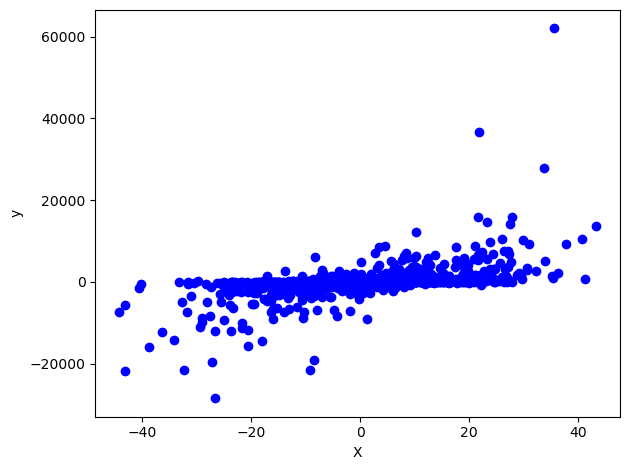

In [6]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(df['X'],df['y'], color='blue')

ax.set_xlabel('X')
ax.set_ylabel('y')
plt.tight_layout()
plt.show()

## Fit the models


In [7]:
### split data into Training and Testing
X = df[['X','X2','X3']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8085)

In [8]:
X_train.shape

(800, 3)

In [9]:
X_test.shape

(200, 3)

### Fit the Linear regression with third order polynomial

In [13]:
lin_reg=LinearRegression().fit(X_train, y_train)
y_predlin = lin_reg.predict(X_test)

In [14]:
rmse_lin = mean_squared_error(y_test, lin_reg.predict(X_test)) **0.5

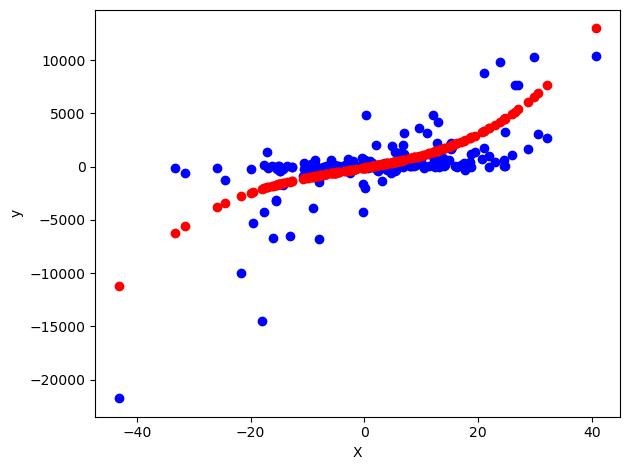

In [15]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X_test['X'],y_test, color='blue')
ax.scatter(X_test['X'],y_predlin, color='red')
ax.set_xlabel('X')
ax.set_ylabel('y')
plt.tight_layout()
plt.show()

## Fit the model using the SGDRegressor

In [21]:
sgd_reg = SGDRegressor(alpha=0, eta0=1e-8, max_iter=1000)
_=sgd_reg.fit(X_train,y_train)
y_predsgd = sgd_reg.predict(X_test)

In [22]:
rmse_sgd = mean_squared_error(y_test,sgd_reg.predict(X_test)) **0.5

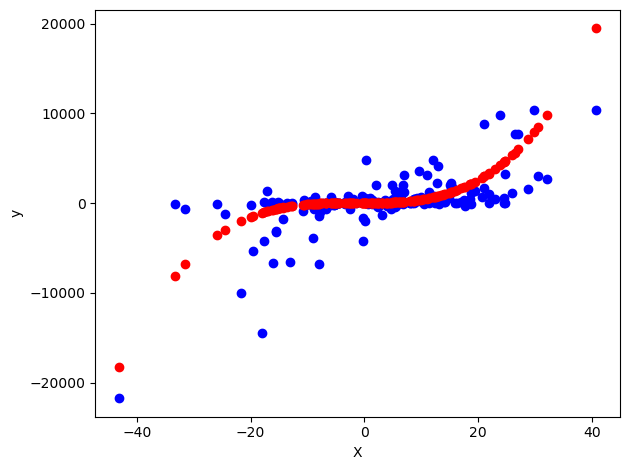

In [23]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X_test['X'],y_test, color='blue')
ax.scatter(X_test['X'],y_predsgd, color='red')
ax.set_xlabel('X')
ax.set_ylabel('y')
plt.tight_layout()
plt.show()

# Conclusion

In [24]:
print(f"the linear Model RMSE: {rmse_lin:,.2f} and the SGD RMSE is: {rmse_sgd:,.2f}")

the linear Model RMSE: 2,262.85 and the SGD RMSE is: 2,352.72


When I used the learning rate of 1e-8, the linear model performed better than the SGD model. However hypertuning the learning rate to 1-e10, the SGD model performed better than the linear model. Hypertuning the SGD model to a learning rate of 1-e2 led to a very poor model. The linear model still performs well as it has the lowest RMSE. 